In [3]:
imagen_path = ('../Datos/IMAGEN_TEST.png')

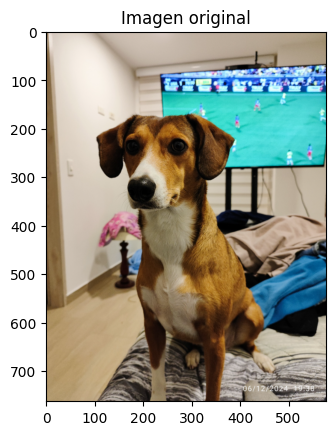

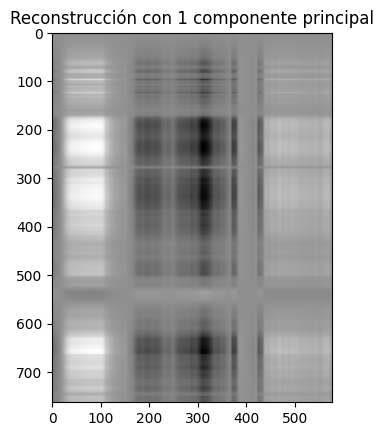

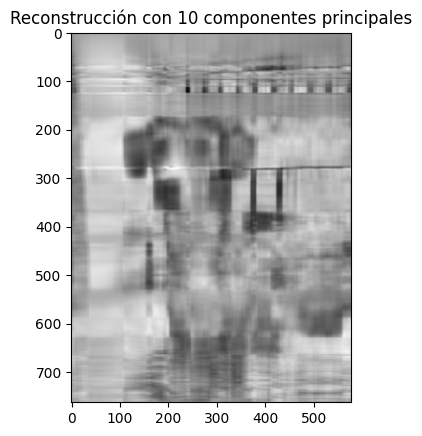

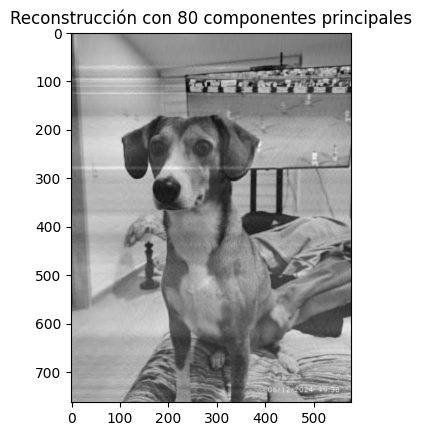

In [ ]:
# -----------------------------------------------------------------------------
# 3) PCA: ejemplo de reconstruir una imagen con 1, 10 y 80 componentes
# -----------------------------------------------------------------------------

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Cargar imagen (ej. 'Spidy.jpg')
img1 = plt.imread(imagen_path)
plt.imshow(img1)
plt.title("Imagen original")
plt.show()

def RGBtoGray(img):
    return 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

img_gray = RGBtoGray(img1)

# Convertir en matriz 2D
X_mean = np.mean(img_gray, axis=1, keepdims=True)
diff = img_gray - X_mean
cov1 = np.matmul(diff.T, diff)
eigenvalues, eigenvectors = LA.eig(cov1)

# Reconstrucción con 1 componente principal
T1 = eigenvectors[:, :1]         # Tomamos el primer eigenvector
Transformed = np.matmul(img_gray, T1)
recon = np.matmul(Transformed, T1.T)
# Convert the reconstructed image data to real numbers
recon = np.real(recon) #This line converts the complex data to real to resolve the error.
plt.imshow(recon, cmap='gray')
plt.title("Reconstrucción con 1 componente principal")
plt.show()

# Reconstrucción con 10 componentes
T10 = eigenvectors[:, :10]
Transformed10 = np.matmul(img_gray, T10)
recon10 = np.matmul(Transformed10, T10.T)
recon10 = np.real(recon10) #This line converts the complex data to real to resolve the error.

plt.imshow(recon10, cmap='gray')
plt.title("Reconstrucción con 10 componentes principales")
plt.show()

# Reconstrucción con 80 componentes
T80 = eigenvectors[:, :80]
Transformed80 = np.matmul(img_gray, T80)
recon80 = np.matmul(Transformed80, T80.T)
recon80 = np.real(recon80) #This line converts the complex data to real to resolve the error.

plt.imshow(recon80, cmap='gray')
plt.title("Reconstrucción con 80 componentes principales")
plt.show()